In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/MachineLearning/Sentiment-Analysis/AmazonReview.csv"
dataset = pd.read_csv(path)

In [ ]:
dataset.shape

(25000, 2)

In [ ]:
dataset.head(5)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.loc[dataset['Sentiment']>3,'Sentiment']

15000    4
15001    4
15002    4
15003    4
15004    4
        ..
24995    5
24996    5
24997    5
24998    5
24999    5
Name: Sentiment, Length: 9999, dtype: int64

In [ ]:
#1,2,3->negative(i.e 0)
dataset.loc[dataset['Sentiment']<=3,'Sentiment'] = 0
 
#4,5->positive(i.e 1)
dataset.loc[dataset['Sentiment']>3,'Sentiment'] = 1

In [ ]:
# dataset.loc[dataset['Sentiment']==1]
print(len(stopwords.words()))

10405


In [ ]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
dataset['Review']=dataset['Review'].apply(clean_review)


In [ ]:
print(dataset['Review'])

0        Fast shipping product cheaply made I brought g...
1        This case takes long ship even worth DONT BUY!!!!
2        Good droids. Not good iPhones. You cannot use ...
3        The cable compatible macbook iphone. Also conn...
4        The case nice glow light. I'm disappointed pro...
                               ...                        
24995    These cables (lightning) far superior cables m...
24996    This unit performs exactly advertised. I use c...
24997    I key cut local hardware store cut free, progr...
24998    I love case I ordered amazon. It color looked ...
24999    Awsome!!! I loved little speaker. It great sou...
Name: Review, Length: 24999, dtype: object


In [ ]:
dataset['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [ ]:
consolidated=' '.join(word for word in dataset['Review'][dataset['Sentiment']==0].astype(str))

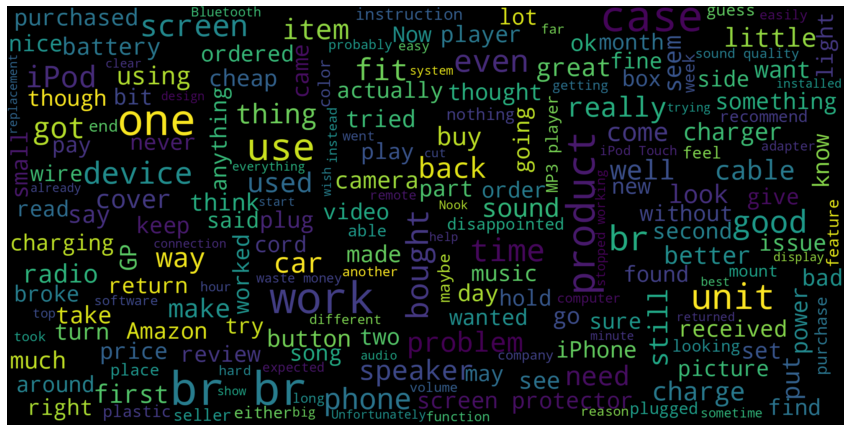

In [ ]:
wordCloud=WordCloud(width=2000,height=1000,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
consolidated=' '.join(word for word in dataset['Review'][dataset['Sentiment']==1].astype(str))
print(consolidated)

Output hidden; open in https://colab.research.google.com to view.

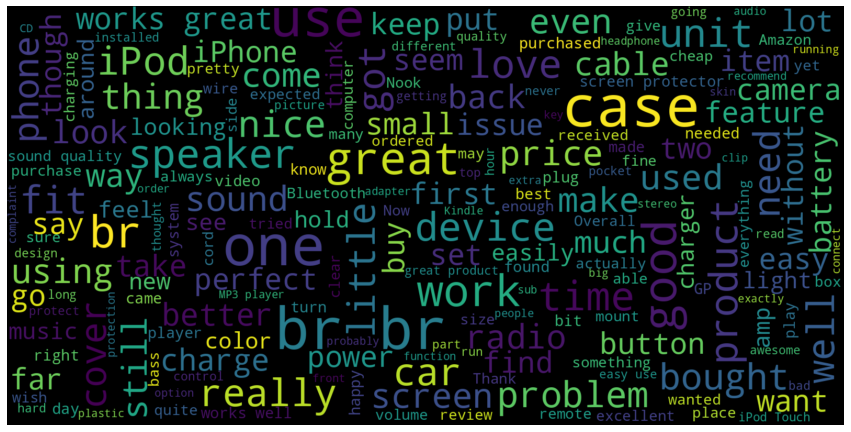

In [ ]:
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(threshold=1000)

In [ ]:
cv = TfidfVectorizer(max_features=2500)

In [ ]:
X = cv.fit(dataset['Review'] )
X = cv.transform(dataset['Review']).toarray()

In [ ]:
# import numpy as np
# np.set_printoptions(threshold=1000)

In [ ]:
# n=np.random.randint(0,24999)
# print(len(X[n][0]))
# print(X[n][0])

In [ ]:
print(cv.get_feature_names_out())

In [ ]:
print(len(X))
print(X)

In [ ]:
x= cv.transform(['Battery life of camera is too short']).toarray()

In [ ]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,dataset['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)

In [ ]:
# print(type(x_train))
# print(x_train.shape)
# print(x_train[2,2])
# print(x_train[1])
# len(x_train[0])
# print(x_train[0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)
# print(pred)
 
#model accuracy
print(accuracy_score(y_test,pred))

0.81632


In [ ]:
p=model.predict(x)
p

array([0])

In [ ]:
from sklearn.metrics import confusion_matrix

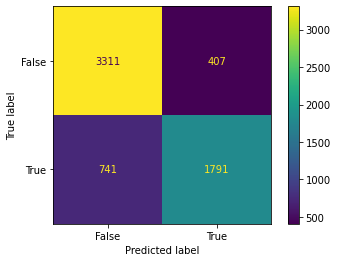

In [ ]:
from sklearn import metrics
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [ ]:
# Create a TfidfVectorizer object
cv = TfidfVectorizer(max_features=2500)

# Fit the TfidfVectorizer on the training data
cv.fit(dataset['Review'])

# Define a new text to predict sentiment for
new_text = "This is a not nice product!  love it."

# Transform the new text into a TF-IDF array
new_text_tfidf = cv.transform([new_text]).toarray()

# Predict the sentiment rating of the new text
pred = model.predict(new_text_tfidf)

# Print the predicted sentiment rating
print(pred)


[1]
